In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import hipp
import os

In [3]:
project_directory = "/home/godinlu/Documents/history-dataset/1980_08_22_aerial_iceland"
images_directory = os.path.join(project_directory, "raw_images")
fiducial_directory = os.path.join(project_directory, "fiducials")
output_directory = os.path.join(project_directory, "preprocess_images")
qc_directory = os.path.join(project_directory, "qc")

preproc = hipp.AerialPreprocessing(
    images_directory=images_directory,
    fiducials_directory=fiducial_directory,
    output_directory=output_directory,
    qc_directory=qc_directory
)

In [4]:
preproc.create_fiducial_template(distance_around_fiducial=70,corner=True)

/home/godinlu/.local/share/hatch/env/virtual/hipp/6cXfZaze/dev/lib/python3.12/site-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
Fiducials detection: 100%|██████████| 46/46 [00:14<00:00,  3.07it/s]


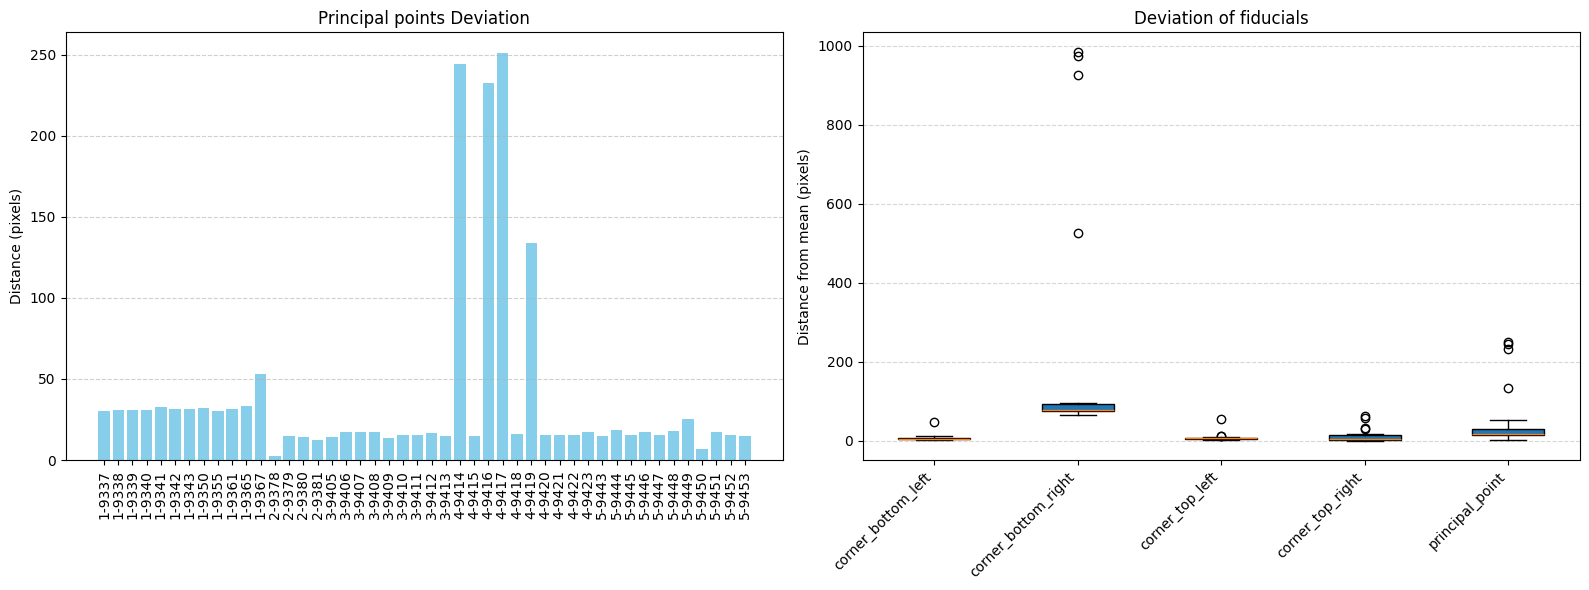

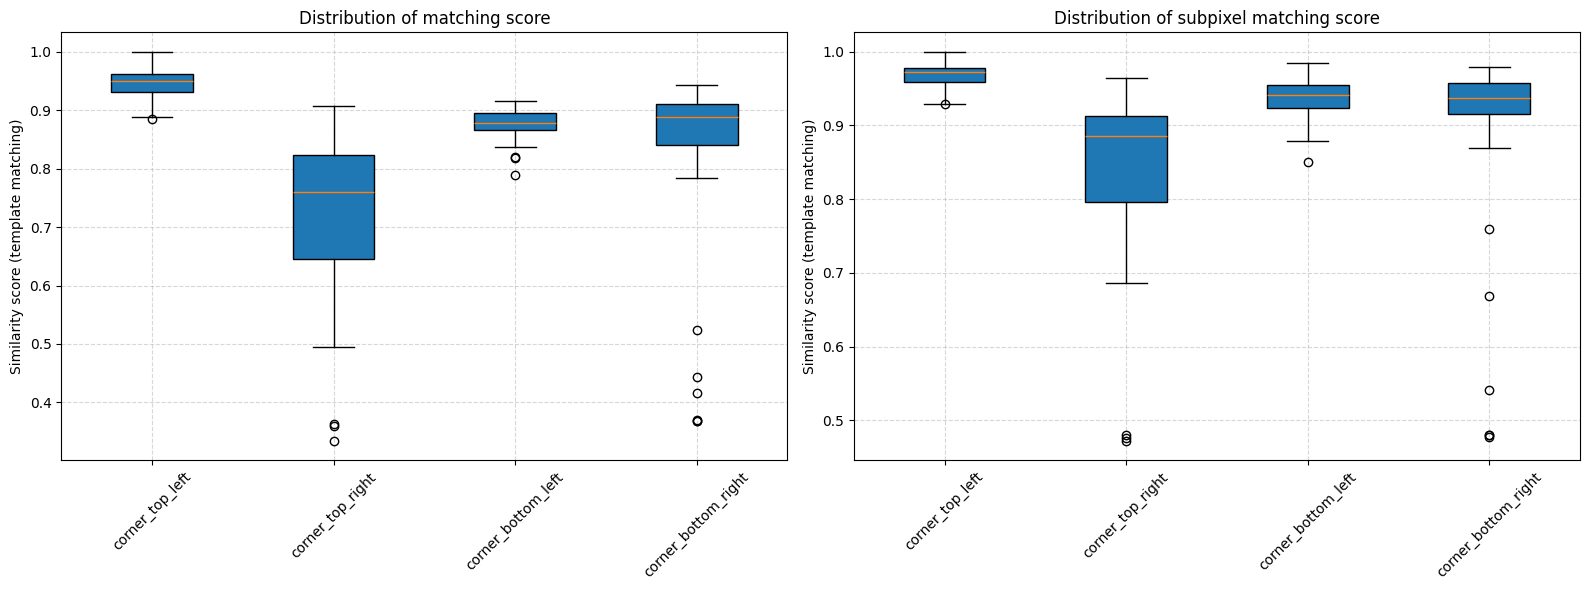

In [5]:
all_detections, all_scores, all_subpixel_scores = preproc.detect_fiducials(grid_size=5)

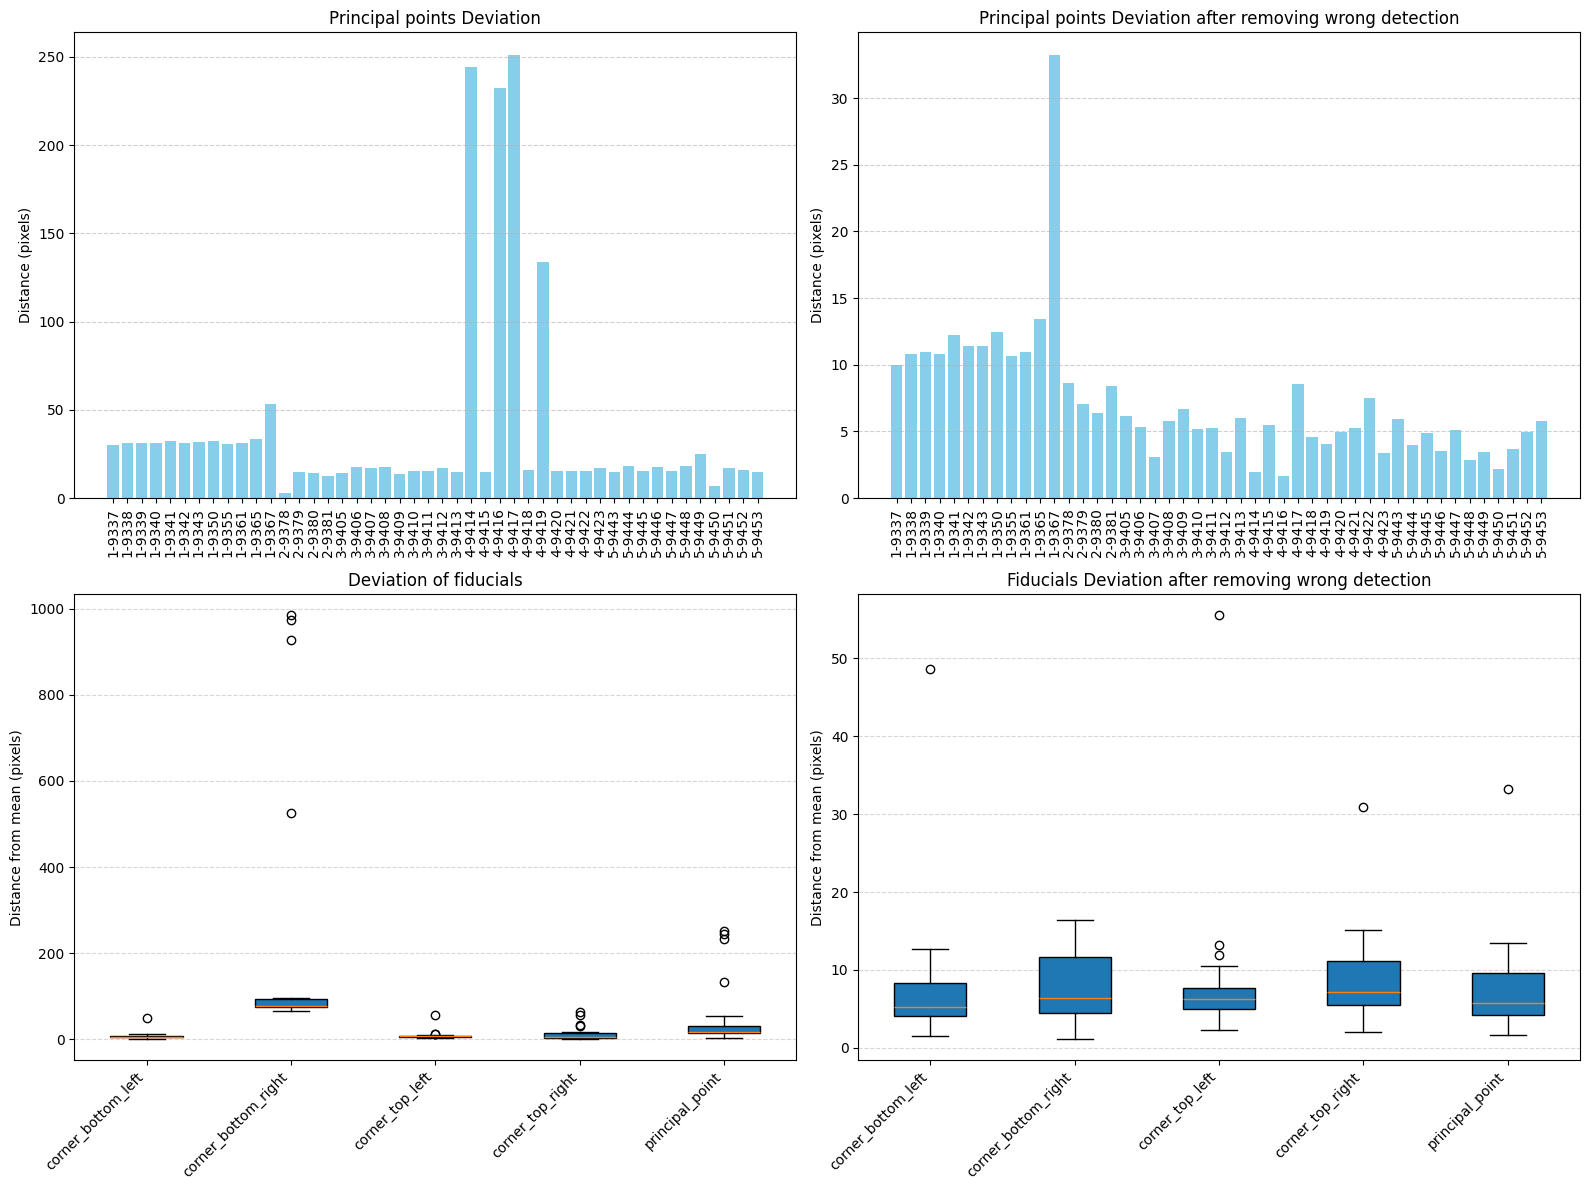

In [6]:
processed_detections = preproc.process_fiducials_detection(all_detections, all_scores, all_subpixel_scores, degree_threshold=0.005)

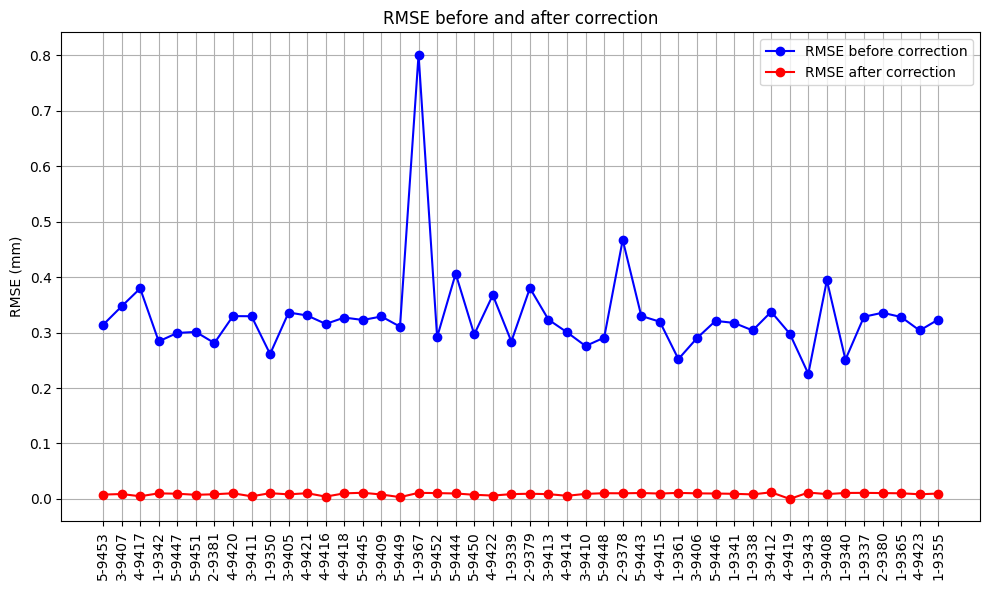

In [7]:
true_fiducials_mm = {
    "corner_bottom_left": (-106.000, 106.004), # 1
    "corner_top_left": (-106.001, -106.004), # 2
    "corner_top_right": (106.003, -106.007), # 3
    "corner_bottom_right": (105.993, 105.997), # 4
}
# here we inverse y axis cause in the calibration report y axis go down instead of going up
true_fiducials_mm = {key : (x, -y) for key, (x, y) in true_fiducials_mm.items()}

res = preproc.images_restitution(
    processed_detections,
    true_fiducials_mm,
    image_square_dim=10600,
    scanning_resolution_mm=0.02,
    transform_image=False,
    crop_image=False,
    clahe_enhancement=False
)